In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
diabetes = pd.read_csv("healthcare-dateset_diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes['Outcome'].value_counts() #data is balanced

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
diabetes.describe() #lots of variables with min 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#calculate the proportion of zero values in each attribute
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
zero_ratios = (diabetes[columns_to_check] == 0).mean()
print(zero_ratios)

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64


In [7]:
diabetes_mean = diabetes[columns_to_check].mean()
diabetes[columns_to_check]=diabetes[columns_to_check].replace(0, diabetes_mean)

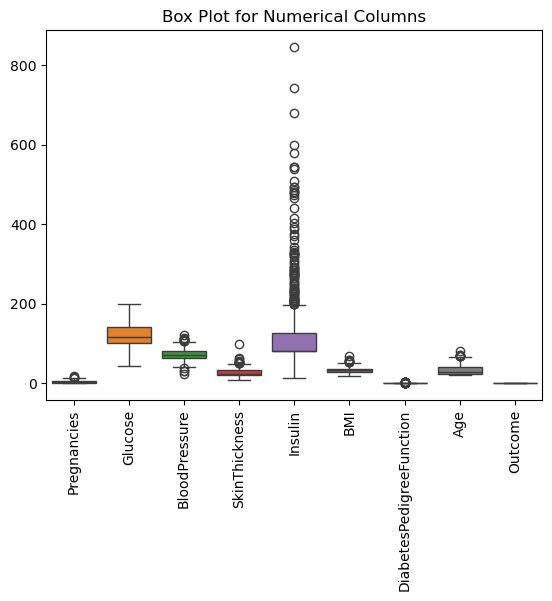

In [8]:
#check for outliers
sns.boxplot(data=diabetes)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot for Numerical Columns')
plt.show()

In [9]:
#remove outliers in insulin var
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
    
diabetes = remove_outliers(diabetes,"Insulin")

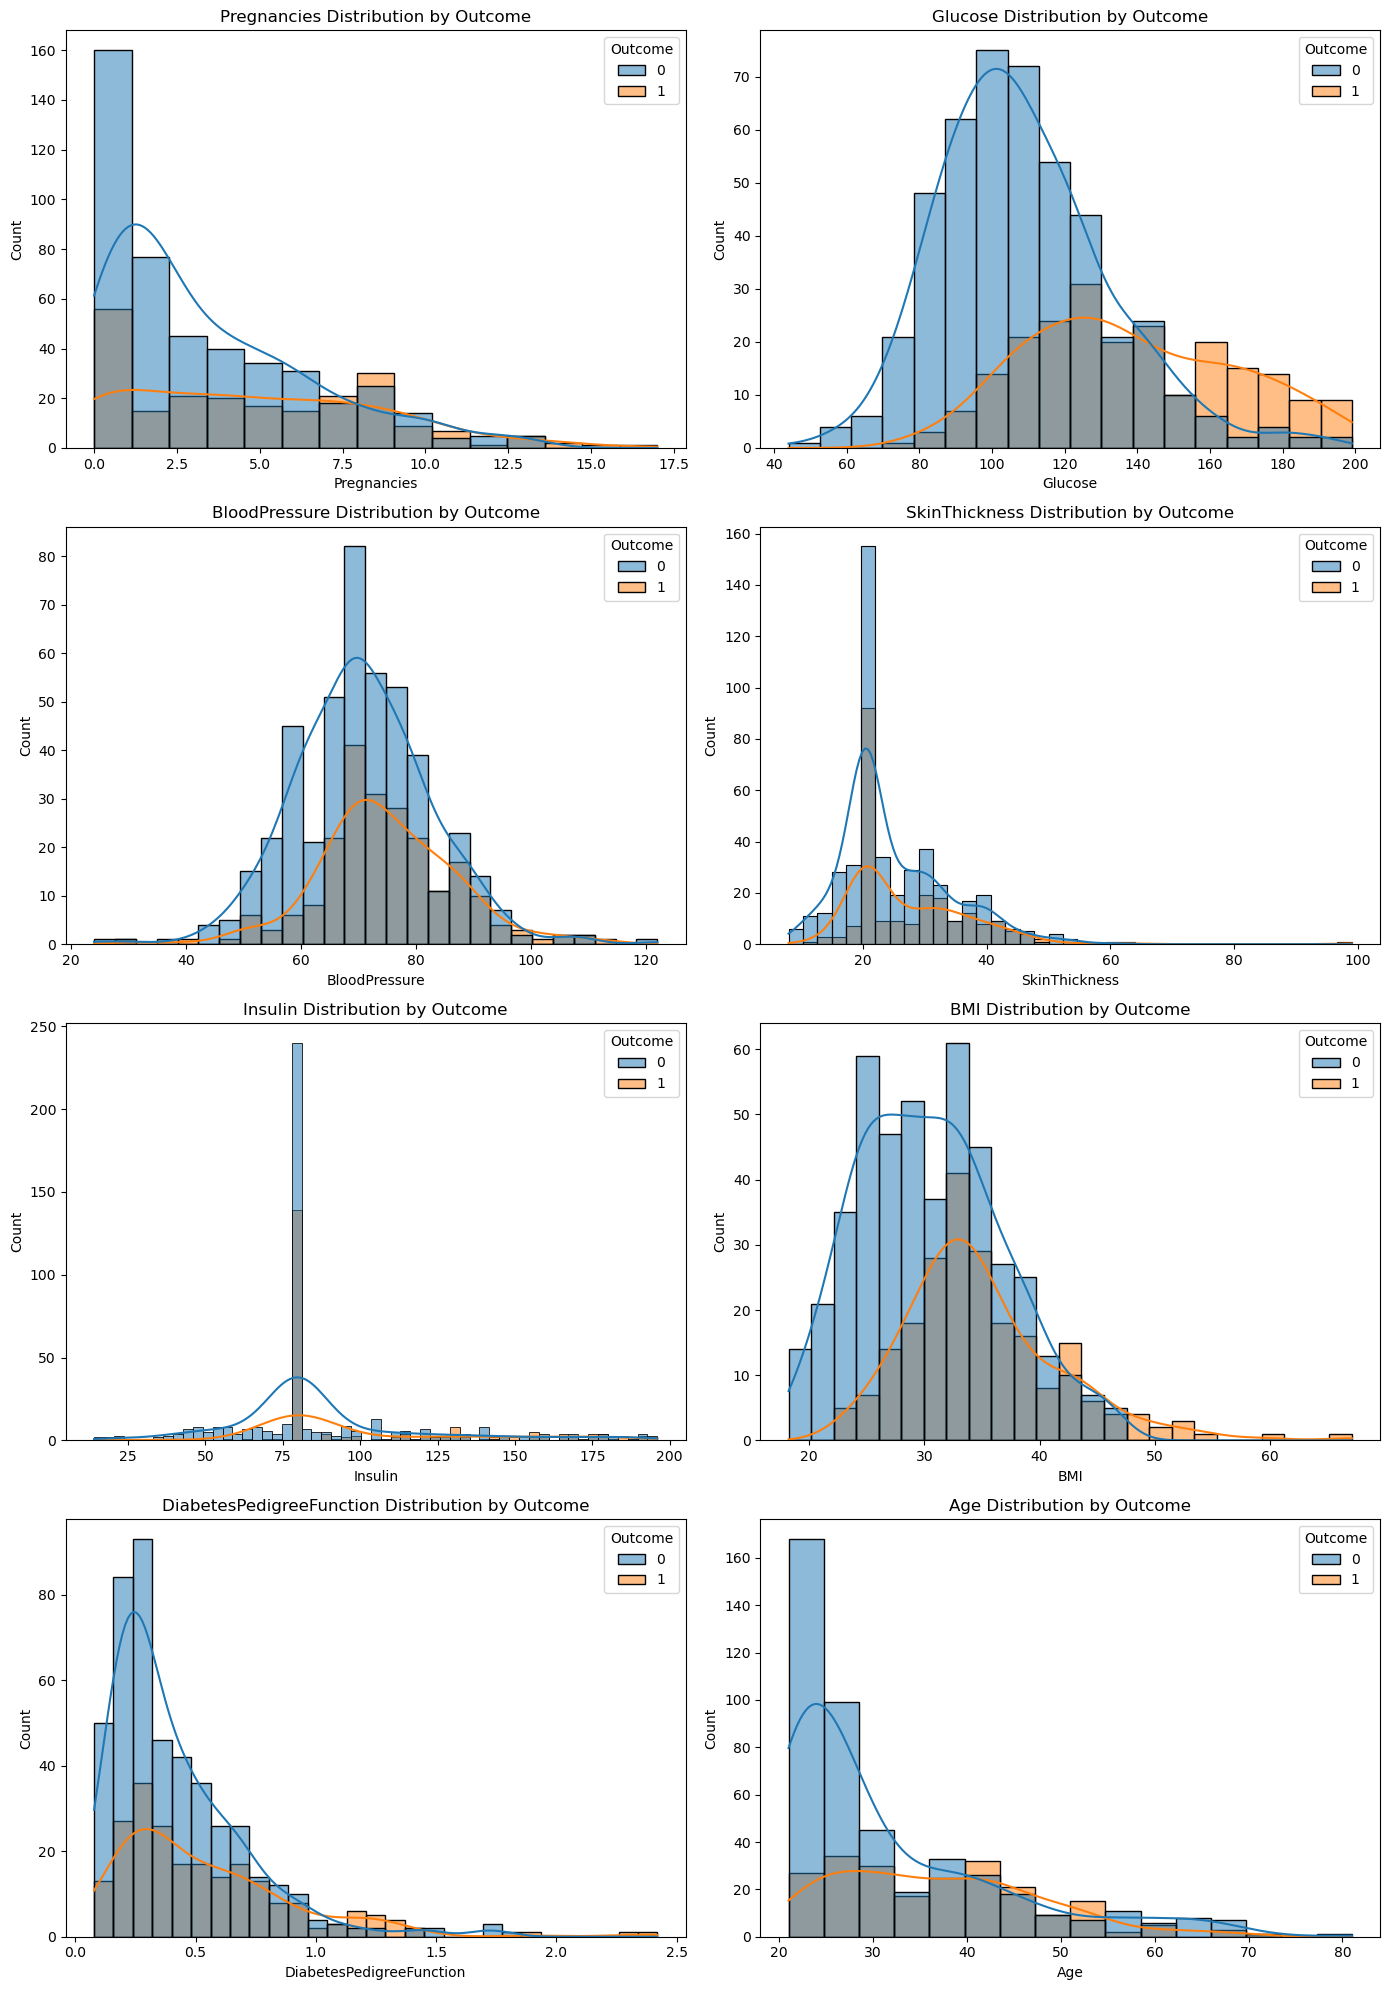

In [10]:
#data visualization
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(4, 2, figsize=(14, 20))  
axes = axes.flatten()  

for i, var in enumerate(variables):
    sns.histplot(data=diabetes, x=var, hue='Outcome', kde=True, ax=axes[i])
    axes[i].set_title(f'{var} Distribution by Outcome')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

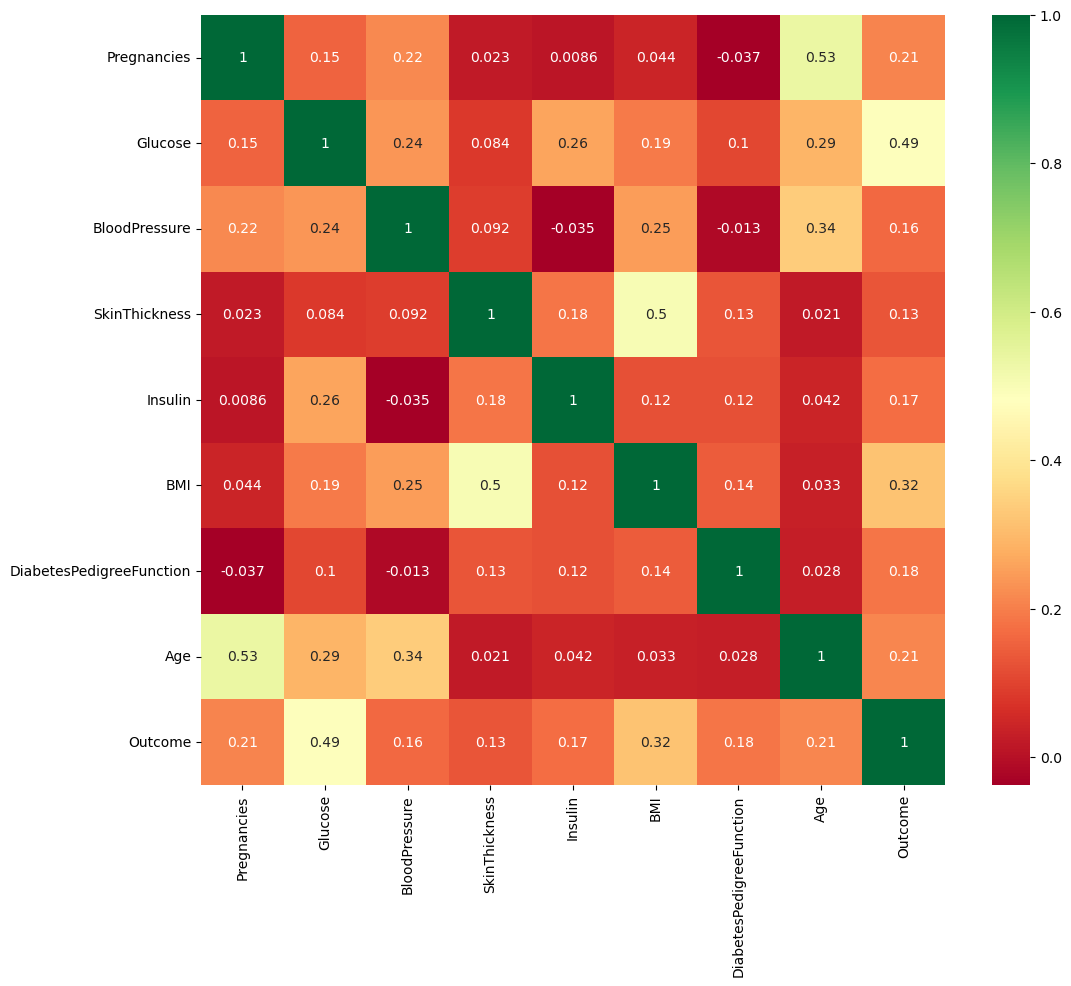

In [11]:
#correlation
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  

In [12]:
X = diabetes.drop("Outcome",axis=1)
y = diabetes["Outcome"]

scaler = StandardScaler()
X_scaled =  pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.630084,1.032455,0.000038,0.993638,-0.345619,0.243136,0.535481,1.430747
1,-0.846199,-1.143978,-0.495318,0.344930,-0.345619,-0.795740,-0.331994,-0.186112
2,1.220597,2.241584,-0.660436,-0.570130,-0.345619,-1.285497,0.676917,-0.101015
3,-0.846199,-1.005792,-0.495318,-0.303777,0.073662,-0.573124,-0.910311,-1.037091
4,-1.141456,0.652443,-2.641857,0.993638,2.258567,1.653041,5.756049,-0.015917


In [13]:
##logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_log = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       138
           1       0.65      0.55      0.60        66

    accuracy                           0.76       204
   macro avg       0.73      0.70      0.71       204
weighted avg       0.75      0.76      0.75       204



In [14]:
#define the function for confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['No Diabetes', 'Diabetes'])
    ax.yaxis.set_ticklabels(['No Diabetes', 'Diabetes']) 
    plt.show()

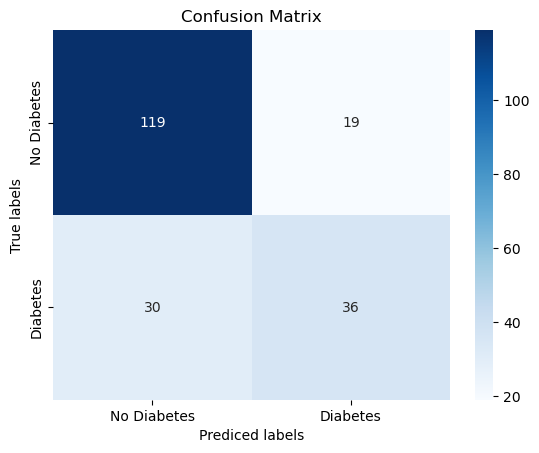

In [15]:
plot_confusion_matrix(y_test, y_pred_log)

In [16]:
#calculate the sensitivity and specificity
cm_log = confusion_matrix(y_test, y_pred_log)
TN, FP, FN, TP = cm_log.ravel()
sensitivity = TP / (TP + FN)  
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}") #not bad

Sensitivity: 0.55
Specificity: 0.86


In [17]:
#Adjust class weights to handle imbalanced data
logistic_regression2 = LogisticRegression(class_weight="balanced")  #model assigns higher weights to stroke=1
logistic_regression2.fit(X_train, y_train)

y_pred_log2 = logistic_regression2.predict(X_test)
print(classification_report(y_test, y_pred_log2))

cm_log2 = confusion_matrix(y_test, y_pred_log2)
TN, FP, FN, TP = cm_log2.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       138
           1       0.60      0.71      0.65        66

    accuracy                           0.75       204
   macro avg       0.73      0.74      0.73       204
weighted avg       0.77      0.75      0.76       204

Sensitivity: 0.71
Specificity: 0.78


In [18]:
#use SMOTE to handle reduce class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_balanced,y_train_balanced = smote.fit_resample(X_train, y_train)
logistic_regression3=LogisticRegression()
logistic_regression3.fit(X_train_balanced,y_train_balanced)
y_pred_log3 = logistic_regression3.predict(X_test)
print(classification_report(y_test,y_pred_log3))

cm_log3 = confusion_matrix(y_test, y_pred_log3)
TN, FP, FN, TP = cm_log3.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       138
           1       0.63      0.71      0.67        66

    accuracy                           0.77       204
   macro avg       0.74      0.75      0.75       204
weighted avg       0.78      0.77      0.77       204

Sensitivity: 0.71
Specificity: 0.80


Best k based on Elbow Method: 19


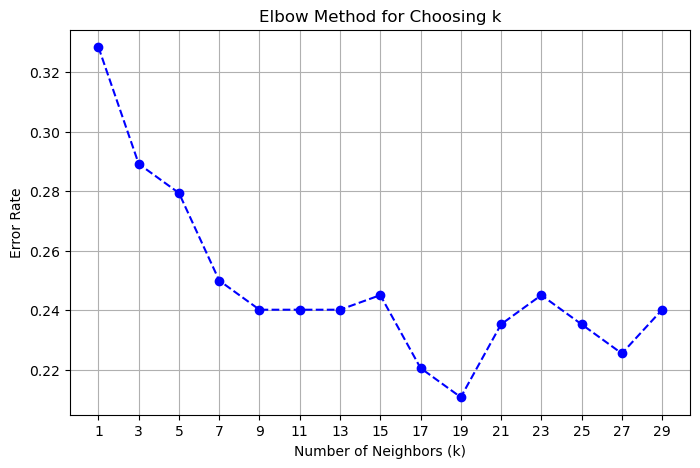

In [19]:
##KNN
#use the elbow method to find the best k
k_values = range(1, 30, 2)  
error_rates = []  

# compute error rate for different k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)  
    error = 1 - accuracy_score(y_test, y_pred)  
    error_rates.append(error)

# plot k vs. error rate 
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Choosing k")
plt.xticks(k_values)  
plt.grid(True)

best_k = k_values[np.argmin(error_rates)]
print(f"Best k based on Elbow Method: {best_k}")

plt.show()

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       138
           1       0.76      0.52      0.61        66

    accuracy                           0.79       204
   macro avg       0.78      0.72      0.73       204
weighted avg       0.78      0.79      0.78       204



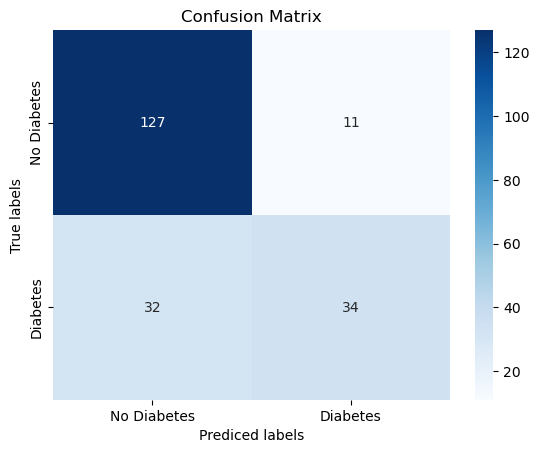

Sensitivity: 0.52
Specificity: 0.92


In [20]:
# use the optimal k for the model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)  # Train the model on the full training set
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

#display the confusion matrix
plot_confusion_matrix(y_test, y_pred_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
TN, FP, FN, TP = cm_knn.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

In [21]:
from imblearn.over_sampling import SMOTE

#we will use smote to balance the data and decrease k to increase the sensitivity (class_weight doesn't apply to knn)
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn2 = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn2.fit(X_train_resampled, y_train_resampled)
y_pred_knn2 = knn2.predict(X_test)

print(classification_report(y_test, y_pred_knn2))

cm_knn2 = confusion_matrix(y_test, y_pred_knn2)
TN, FP, FN, TP = cm_knn2.ravel()
sensitivity = TP / (TP + FN)   
specificity = TN / (TN + FP)  
print(f"Sensitivity: {sensitivity:.2f}") 
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       138
           1       0.51      0.65      0.57        66

    accuracy                           0.68       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.71      0.68      0.69       204

Sensitivity: 0.65
Specificity: 0.70


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       138
           1       0.60      0.59      0.60        66

    accuracy                           0.74       204
   macro avg       0.70      0.70      0.70       204
weighted avg       0.74      0.74      0.74       204



/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


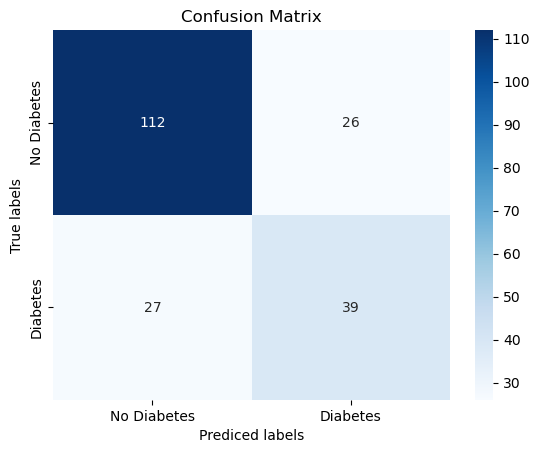

Sensitivity: 0.59
Specificity: 0.81


In [22]:
##neural network
#basic model
mlp_baseline = MLPClassifier(hidden_layer_sizes=(32,),  
                             activation='relu',       
                             solver='adam',           
                             max_iter=1000,           
                             random_state=123)

mlp_baseline.fit(X_train, y_train)
y_pred_nn_baseline = mlp_baseline.predict(X_test)

print(classification_report(y_test, y_pred_nn_baseline))
plot_confusion_matrix(y_test, y_pred_nn_baseline)

cm_nn_baseline = confusion_matrix(y_test, y_pred_nn_baseline)
TN, FP, FN, TP = cm_nn_baseline.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

In [23]:
#adjustment
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

mlp_balanced = MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000,random_state=123)
mlp_balanced.fit(X_train_resampled, y_train_resampled)


y_pred_nn_balanced = mlp_balanced.predict(X_test)
print(classification_report(y_test, y_pred_nn_balanced))

cm_nn_balanced = confusion_matrix(y_test, y_pred_nn_balanced)
TN, FP, FN, TP = cm_nn_balanced.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       138
           1       0.56      0.67      0.61        66

    accuracy                           0.73       204
   macro avg       0.69      0.71      0.70       204
weighted avg       0.74      0.73      0.73       204

Sensitivity: 0.67
Specificity: 0.75


/Users/taraaa/miniforge3/envs/dasc_5410/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
